## Data Visualization

* Data visualization is an important step for researchers to present their work. 
* There are many different libraries for data visualization, such as matplotlib, bokeh and bqplot 
* Matplotlib is widely used in many different areas.
* Bokeh provides interactive visualization library over large datasets.

## Learning Outcomes

* Use matplotlib for simple plotting
* Understand matplotlib plot features
* Use matplotlib for histogram and heat map
* Use Bokeh for simple plotting
* Build an interactive widget with bokeh

## Requirements 

* Confirm you have matplotlib and bokeh installed by typing 'pip list' in a command window, and search fo matplotlib and bokeh.
* Install the packages if you couldn't find them, 'pip install matplotlib', 'pip install bokeh' 


## Simple plot example with matplotlib 

In [1]:
### load matplolib and numpy
import matplotlib.pyplot as plt
import numpy as np 

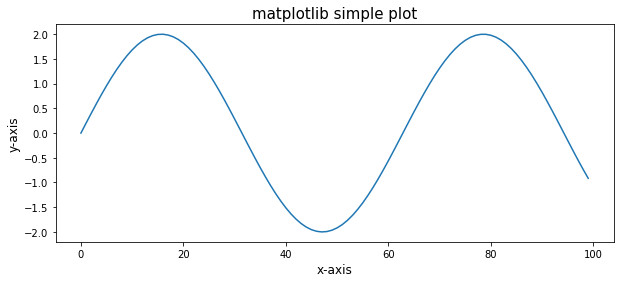

In [2]:
x_array = np.arange(0,100)
y_array = 2*np.sin(x_array*0.1)

fig = plt.figure(1,figsize = (10,4))
plt.plot(x_array,y_array)
plt.xlabel('x-axis',fontsize = 12)
plt.ylabel('y-axis',fontsize = 12)
plt.title('matplotlib simple plot',fontsize = 15)
plt.show()

### you can try %pylab inline as the first line of the code, so you don't need to import matplotlib.pyplot and do plt.show()

## Understand matplotlib features

In [3]:
### figure copied from https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://matplotlib.org/_images/anatomy.png")


## Histrogram and Heatmap

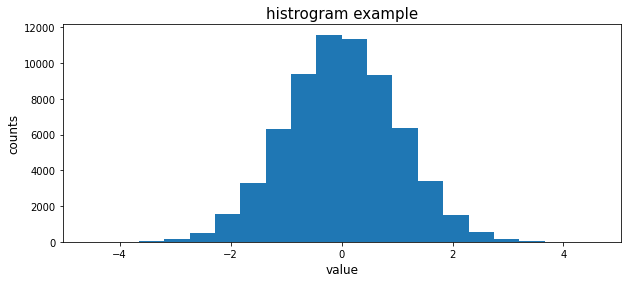

In [4]:
N_points = 2**16
result = np.random.normal(loc = 0.,scale = 1.,size = N_points)

fig = plt.figure(1,figsize = (10,4))
plt.hist(result, bins = 20)
plt.xlabel('value',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.title('histrogram example',fontsize = 15)
plt.show()

In [5]:
### heat map
import matplotlib.cm as cm ### cmap tables
x = np.arange(-10,10,0.01)
y = np.arange(-10,10,0.01)

xx, yy = np.meshgrid(x, y, sparse = False)

def Gaussian_Beam(x,y,width):
    z = np.exp(-(x)**2/width-(y)**2/width)
    return z

z = Gaussian_Beam(xx,yy,2)

fig = plt.figure(1,figsize = (10,4))
plt.imshow(z,cmap=cm.jet)
plt.show()

In [6]:
## plotting a constellation diagram two options

s = np.random.choice([1.+1j, -1+1j,1.- 1j,-1 -1j], 10000)
s += np.random.randn(10000)*0.1 + np.random.randn(10000)*0.1j

fig = plt.figure(2, figsize=(10,5))
plt.subplot(121)
plt.plot(s.real, s.imag, '.')
plt.subplot(122)
plt.hexbin(s.real, s.imag)
plt.show()

## Advanced layout options

As shown above matplotlib lets you layout plots into subplots. This is quite advanced, see below some examples


In [11]:
%matplotlib inline
# using pylab.subplots
fig, axes = plt.subplots(2,2, figsize=(10,10))
cms = [cm.jet, cm.hot, cm.summer, cm.cool]
k = 0
for i in range(2):
    for j in range(2):
        axes[i,j].hexbin(s.real, s.imag, cmap=cms[k])
        k+=1
plt.show()       

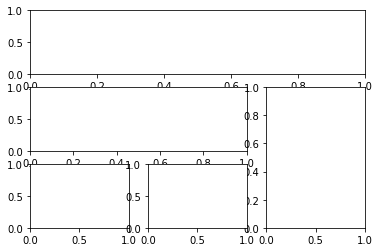

In [12]:
# using subplot2grid even more advanced options are possible
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))
plt.show()

## Notebook magic

There are two ways for plotting with matplotlib in jupyter notebooks. To control which one is used use the `%matplotlib` magic. The default is `%matplotlib inline` which does not provide interactivity (zoom, pan, ...)

In [14]:
%matplotlib inline
fig = plt.figure()
plt.plot(np.linspace(-5*np.pi, 5*np.pi, 200), np.sin(np.linspace(-5*np.pi, 5*np.pi, 200)))
plt.show()

### Interactive matplotlib plots

If you want to be able to interact with your plots, like e.g. zoom in to look more closely you should use the `%matplotlib notebook` magic. This will give you an interactive view, which allows you to interact with the graph. You can also change the data for example. *Note:* Because it allows you interactivity, it will not create a new figure if you just to plt.plot, but instead place the plot into the old figure. So you need to always create figures first.

<IPython.core.display.Javascript object>


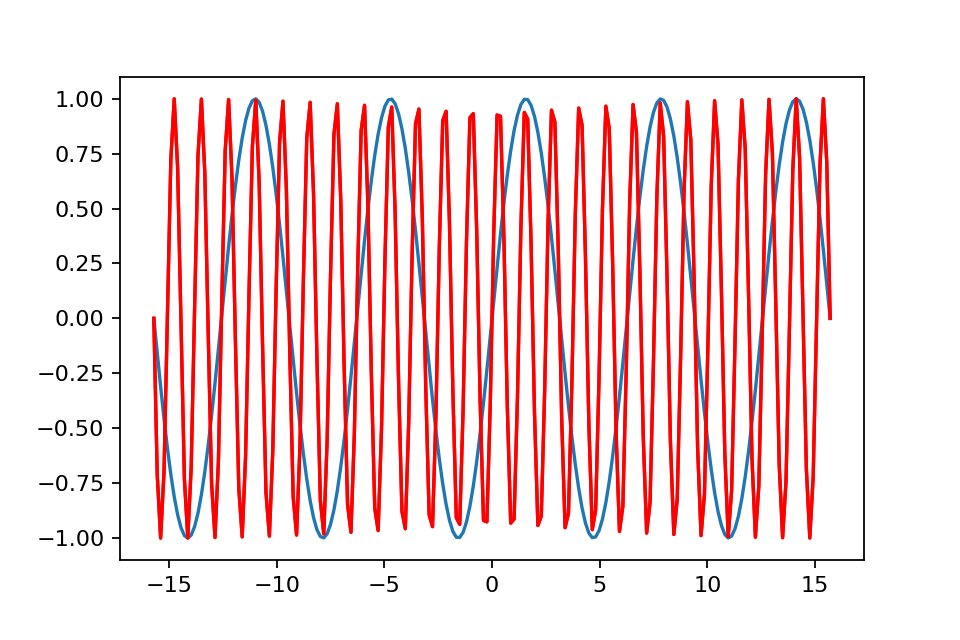

In [16]:
%matplotlib notebook
fig = plt.figure()
plt.plot(np.linspace(-5*np.pi, 5*np.pi, 200), np.sin(np.linspace(-5*np.pi, 5*np.pi, 200)))
plt.show()

In [18]:
plt.plot(np.linspace(-5*np.pi, 5*np.pi, 200), np.sin(5*np.linspace(-5*np.pi, 5*np.pi, 200)), 'r')

<IPython.core.display.Javascript object>


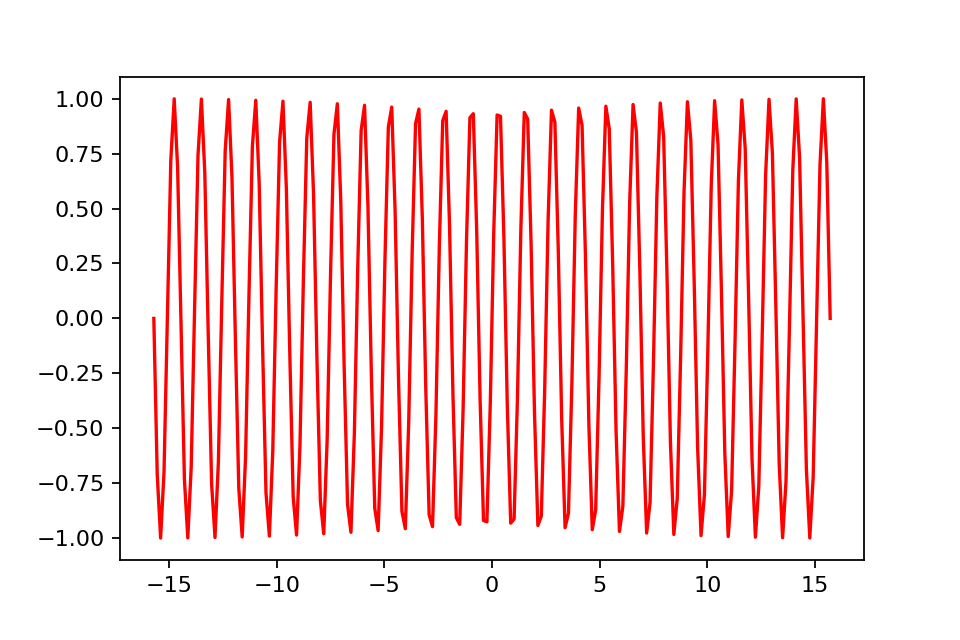

In [19]:
fig=plt.figure()
plt.plot(np.linspace(-5*np.pi, 5*np.pi, 200), np.sin(5*np.linspace(-5*np.pi, 5*np.pi, 200)), 'r')

## Bokeh: simple plotting 

Another option for plotting is the bokeh module. In contrast to matplotlib, it's build for interactive web plotting, and is significantly faster for interactive plots with large datasets.

In [22]:
from bokeh.plotting import figure, output_notebook, show ### import necessary functions from bokeh library
output_notebook()

x_array = np.arange(0,100)
y_array = 2*np.sin(x_array*0.1)

p = figure(title = 'bokeh simple plotting',
           x_axis_label = 'x-axis',
           y_axis_label = 'y-axis',
           plot_height = 300,
           plot_width = 600)
p.line(x_array,y_array,line_width = 1.5)

show(p)

Loading BokehJS ...

## Interactive widget with bokeh

You can easily make interactive widgets with bokeh.

In [23]:
from bokeh.layouts import widgetbox
from bokeh.models import Column
from bokeh.models.widgets import Slider

slider = Slider(start=0, end=10, value=1, step=.1, title="slider")

show(Column(slider))

You can easily make callbacks to create interactivity using bokeh sliders. Depending on your use case, you can for example access the data using javascript only. That way you could export your notebook, and have interactivity without needing python running on your server.

In [16]:
### we need to combine slider with some other python scripts to show interaction
### for example, slider value change could trigger a sine wave plot
### we need to use callback method via CustomJS to trigger the functions...

from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x_array = np.arange(0,1000)
y_array = 2*np.sin(x_array*0.1)

source = ColumnDataSource(data=dict(x=x_array, y=y_array))

plot = figure(plot_width=800, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=1, value=0.1, step=.1, title="freq")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.sin(i*f)
    }
    
    // necessary because we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

## Further reading
* https://matplotlib.org/gallery/index.html
* http://bokeh.pydata.org/en/0.11.1/docs/user_guide/tutorials.html

# Bokeh or Matplotlib

Why two plotting libraries, what are the advantages/disadvantages?

## Bokeh Advantages

* fast
* easy integration in browser
    * conversion to javascript
    * interactive widgets/plots without python code
* good integration with other "deep learning" packages 
    * pandas
    * datashader

## Bokeh Disadvantages

* customisation limited compared to matplotlib
* limited save/export functionality
* plotting takes some getting used to

## Matplotlib Advantages

* high quality plotting
* very customisable
    * latex labels/text
* many export formats 
    * pdf,png,svg,eps,wmf, ...
* easy (matlab-like) plotting interface
    
## Matplotlib Disadvantages

* slow for fast updating plots
* not primarily made for interactive use

## Conclusion

Use matplotlib for:
* plots for publications
* quick and dirty (throwaway) plotting in notebooks
* slow updating interactive applications

Use bokeh for:
* interactive web-"applications"
* interactive jupyter notebooks
* interactive plots with lots of lines/points (webgl backend)


## Other libraries

Arguably the best library for building non-browser based GUI applications is [pyqtgraph](http://www.pyqtgraph.org/). Which is a excellent and fast plotting library for integration into QT a cross-platform GUI framework.

## Exercises

### matplotlib
* Create two plots next to each other plotting a the absolute value squared of a sine wave in the time and frequency domain.
* Change the plot of the frequency domain to be on a logarithm scale, without manual recalculating
* At labels to your axes. Your y-axis should show $|A|^2$, your x-axis should show $\lambda$  (don't worry about the fact that it is not in wavelength). 

### bokeh

* Create a plot with 2 sine waves of different frequencies and with red and green as colors